In [20]:
import pandas as pd

apikey = 'RXM0IAKFKD03B54D'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=INTC&apikey={apikey}&outputsize=full&datatype=csv'

data = pd.read_csv(url)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6047 entries, 0 to 6046
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  6047 non-null   object 
 1   open       6047 non-null   float64
 2   high       6047 non-null   float64
 3   low        6047 non-null   float64
 4   close      6047 non-null   float64
 5   volume     6047 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 283.6+ KB
None


,timestamp,open,high,low,close,volume
0,2023-11-10,38.24,38.990,38.2400,38.86,38871279
1,2023-11-09,38.05,38.515,37.7700,37.80,48955771
2,2023-11-08,38.85,38.890,37.7492,37.92,33483360
3,2023-11-07,38.24,38.900,37.9800,38.77,32052041
4,2023-11-06,38.02,38.200,37.8550,37.95,23877203


In [24]:
data = data.copy().sort_values(['timestamp'])

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Изучить особенности данных

Рассчитать основные статистики для вещественных и категориальных признаков (df.describe(include=’all’))

In [41]:
print("Columns: ", data.columns.values)
data.info()

Columns:  ['timestamp' 'open' 'high' 'low' 'close' 'volume']
<class 'pandas.core.frame.DataFrame'>
Index: 6047 entries, 6046 to 0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  6047 non-null   object 
 1   open       6047 non-null   float64
 2   high       6047 non-null   float64
 3   low        6047 non-null   float64
 4   close      6047 non-null   float64
 5   volume     6047 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 330.7+ KB


In [59]:
print(f"Loaded data period from: {data['timestamp'][data.shape[0] -1]} to {data['timestamp'][0]}")
data.describe()

Loaded data period from: 1999-11-01 to 2023-11-10


,open,high,low,close,volume
count,6047.000000,6047.000000,6047.000000,6047.000000,6.047000e+03
mean,33.820927,34.288320,33.362756,33.820594,4.606582e+07
std,18.860644,19.254339,18.525606,18.884506,2.569387e+07
min,12.150000,12.630000,12.050000,12.080000,1.155400e+06
25%,21.925000,22.140000,21.650000,21.917500,2.654090e+07
50%,28.010000,28.415000,27.620000,28.040000,4.171070e+07
75%,37.530000,37.932500,37.025000,37.445000,5.951885e+07
max,146.600000,147.500000,144.400000,146.700000,3.093476e+08


Среднее по месяцам

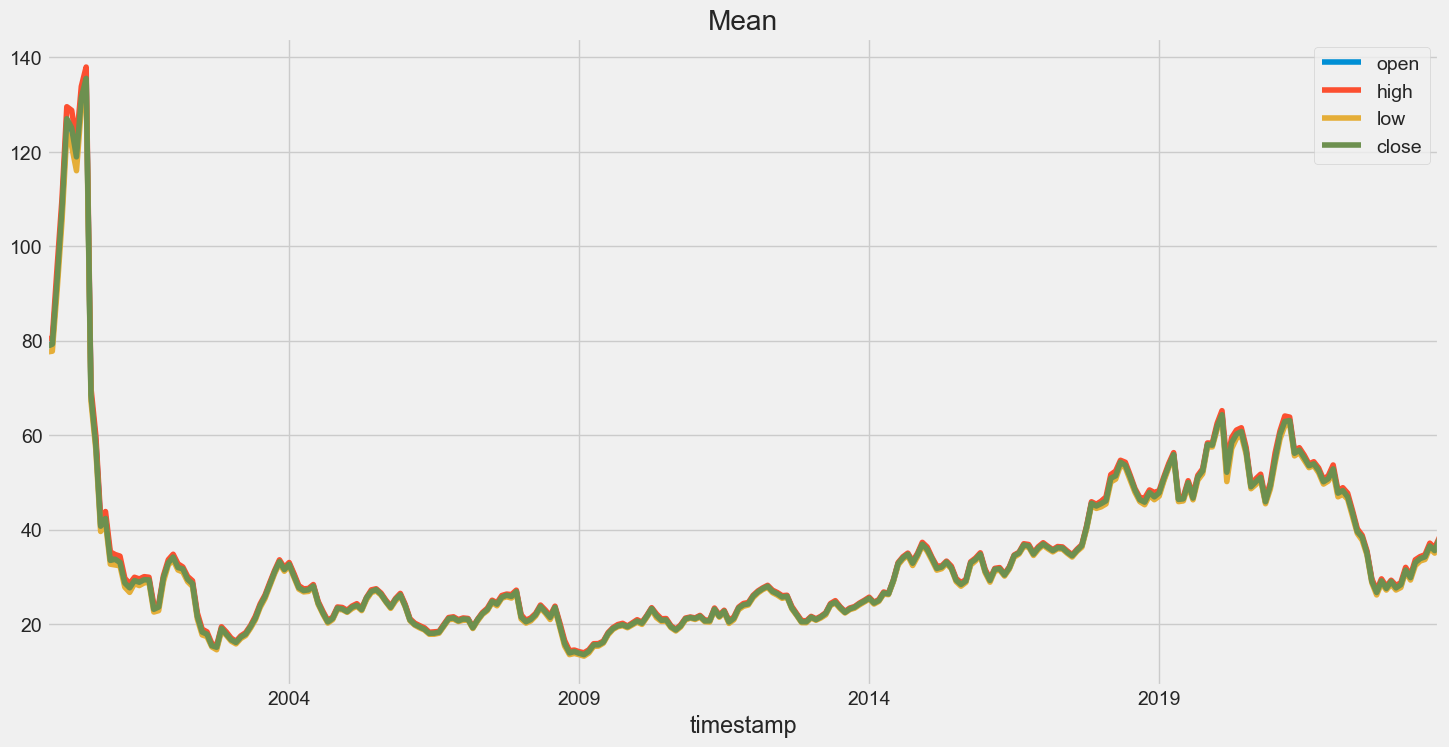

In [124]:
plt.figure(figsize=(16, 8))
for c in data.columns[1:-1]:
    monthly_mean = data.groupby(pd.PeriodIndex(data['timestamp'], freq="M"))[c].mean()
    monthly_mean.plot(legend=True)
plt.title('Mean')
plt.show()


Дисперсия по месяцам

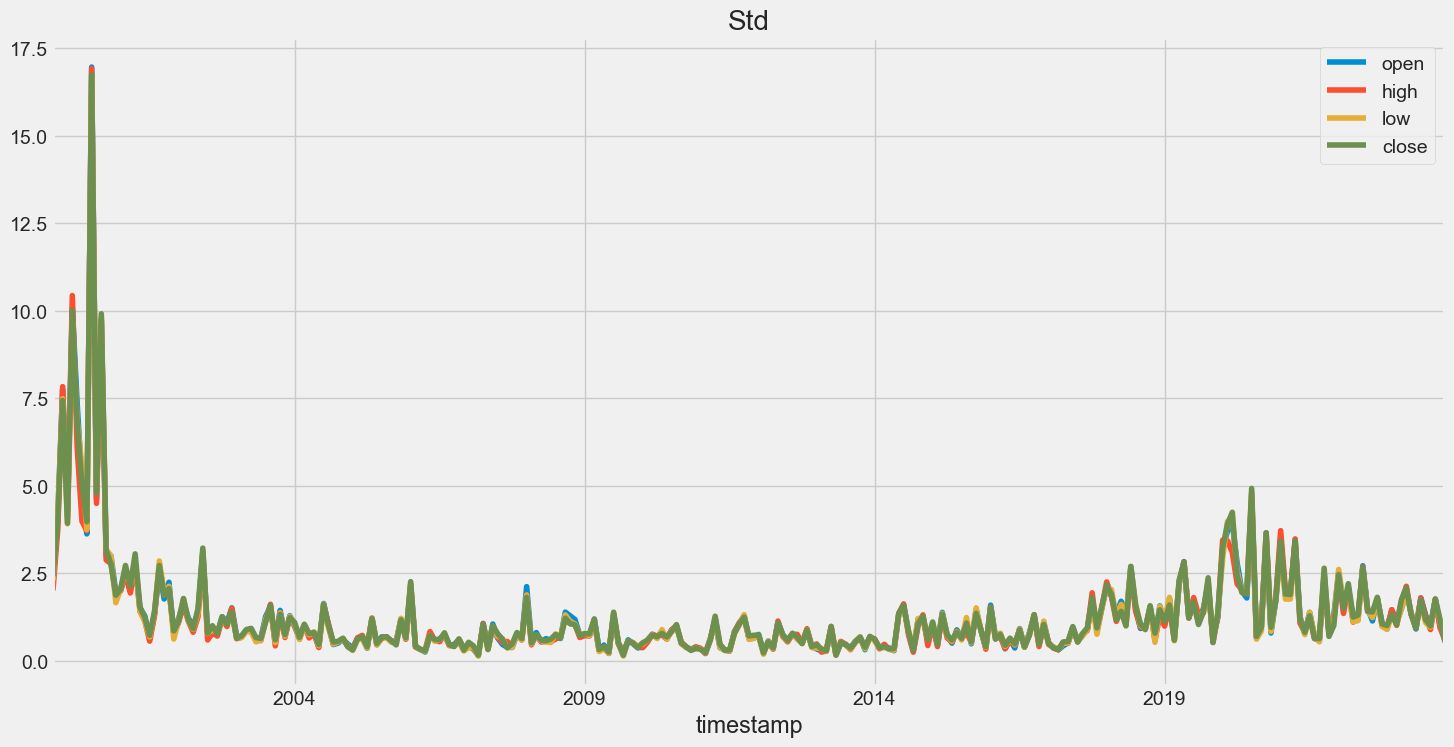

In [123]:
plt.figure(figsize=(16, 8))
for c in data.columns[1:-1]:
    monthly_std = data.groupby(pd.PeriodIndex(data['timestamp'], freq="M"))[c].std()
    monthly_std.plot(legend=True)
plt.title('Std')
plt.show()


Volume среднее и дисперсия

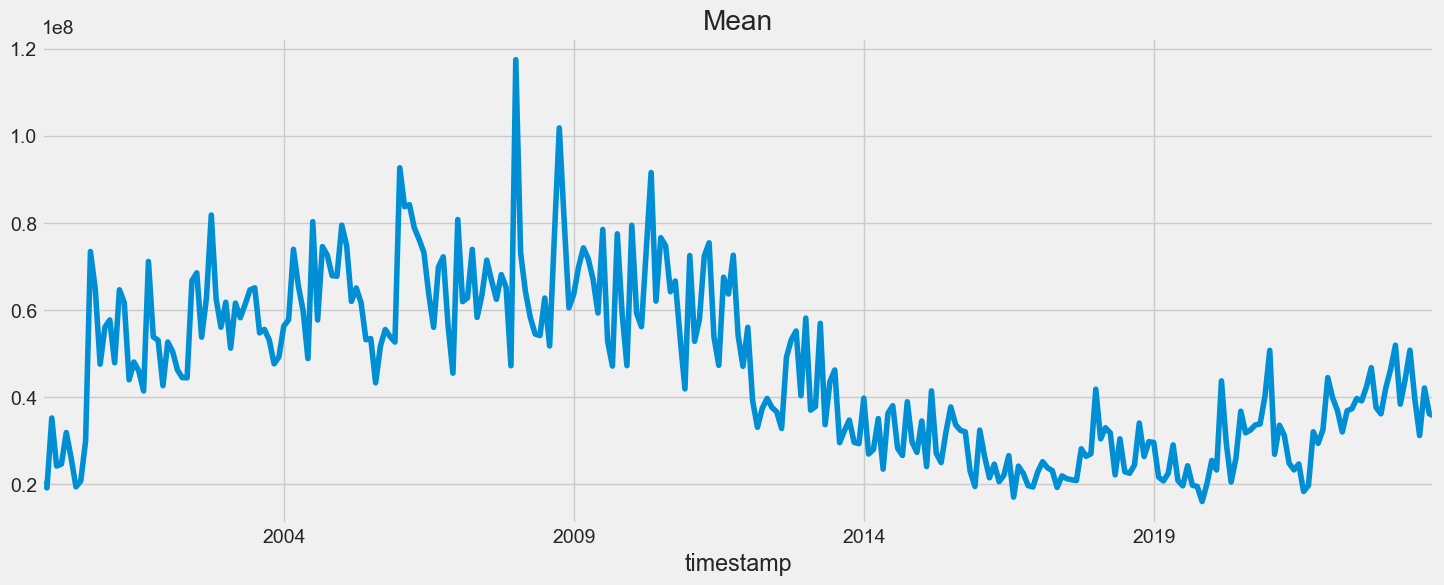

In [119]:
plt.figure(figsize=(16, 6))
monthly_mean = data.groupby(pd.PeriodIndex(data['timestamp'], freq="M"))['volume'].mean()
monthly_mean.plot()
plt.title('Mean')
plt.show()

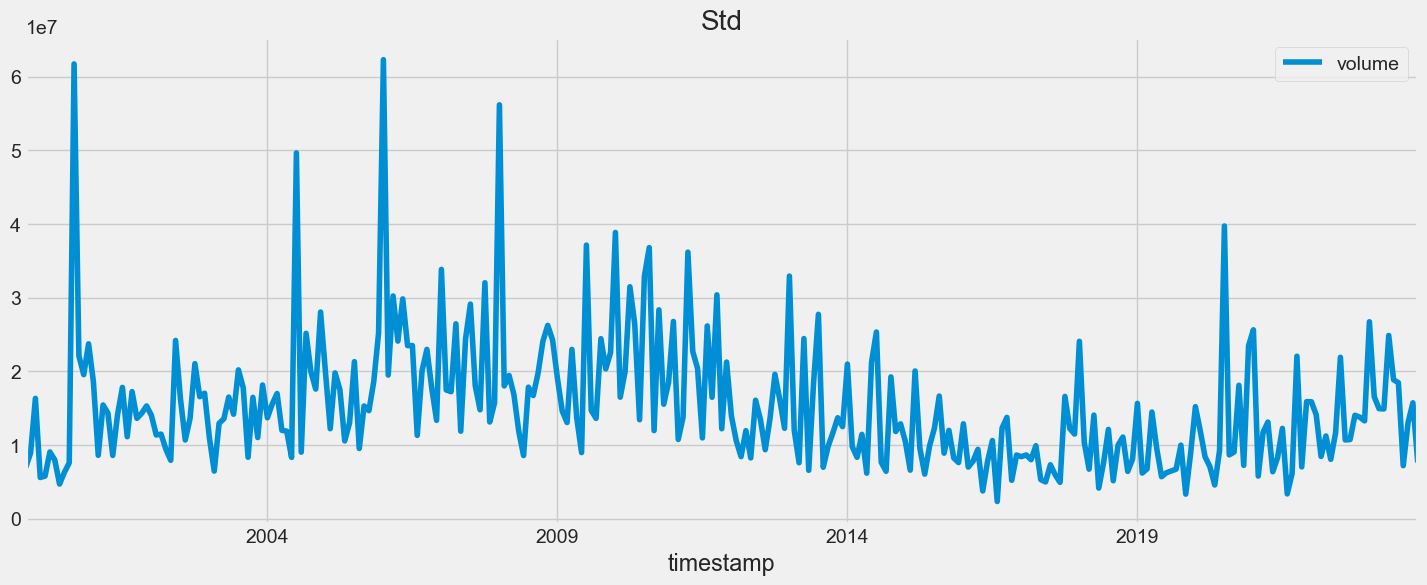

In [121]:
plt.figure(figsize=(16, 6))
monthly_std = data.groupby(pd.PeriodIndex(data['timestamp'], freq="M"))['volume'].std()
monthly_std.plot(legend=True)
plt.title('Std')
plt.show()

Вывод: необходимо проверить гипотезу о типе связи между mean and std

# Пропущенные значения

In [61]:
print("Количество пропущенных значений:", data.isna().sum().sum())

Количество пропущенных значений: 0


Вывод: пропущенныз значений нет, но т.к. предсказания планируется делать не на статичном датасете, возможно, стоит сделать обработку пропущенных значений на случай пропусков.

# Ошибочные значения

Наверное, можно исходить из аксиомы, что трейдинг платформа не может отдавать неверные данные. Ниже несколько sanity checks

In [132]:
import numpy as np
print("Quantity of negative values: ", np.where(data.iloc[:, 1:] < 0, 1, 0).sum())

Quantity of negative values:  0


# Существуют ли выбросы?

Для начала, необходимо определиться, что есть выброс в нашем датасете. Например, возможны резкие колебания в связи с недельностью. Необходимо решить, как учитывать данные особенности в данных.

# Поведения признаков

Изучить поведение каждого признака в отдельности, его связь с целевой переменной, а также попарные корреляции (в т.ч и в особенности с таргетом). Визуализировать попарные распределения признаков (sns.pairplot()) и корреляции наиболее значимых. Построить подходящие сводные таблицы и прочие диаграммы.

Априори все фичи сильно кореллированы с таргетом.

In [136]:
# Генерируем таргет
data['target'] = (data['open'] + data['close']) / 2
data.head()

,timestamp,open,high,low,close,volume,target
6046,1999-11-01,77.63,78.31,75.94,76.00,22934100,76.815
6045,1999-11-02,77.06,78.19,76.56,77.50,20338200,77.280
6044,1999-11-03,78.38,80.69,77.75,79.75,25240100,79.065
6043,1999-11-04,80.44,81.75,80.19,81.56,21843500,81.000
6042,1999-11-05,82.38,83.88,81.81,82.38,19837200,82.380


/Users/dev.daniil.bakushkin/miniconda3/envs/shad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dev.daniil.bakushkin/miniconda3/envs/shad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dev.daniil.bakushkin/miniconda3/envs/shad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dev.daniil.bakushkin/miniconda3/envs/shad/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

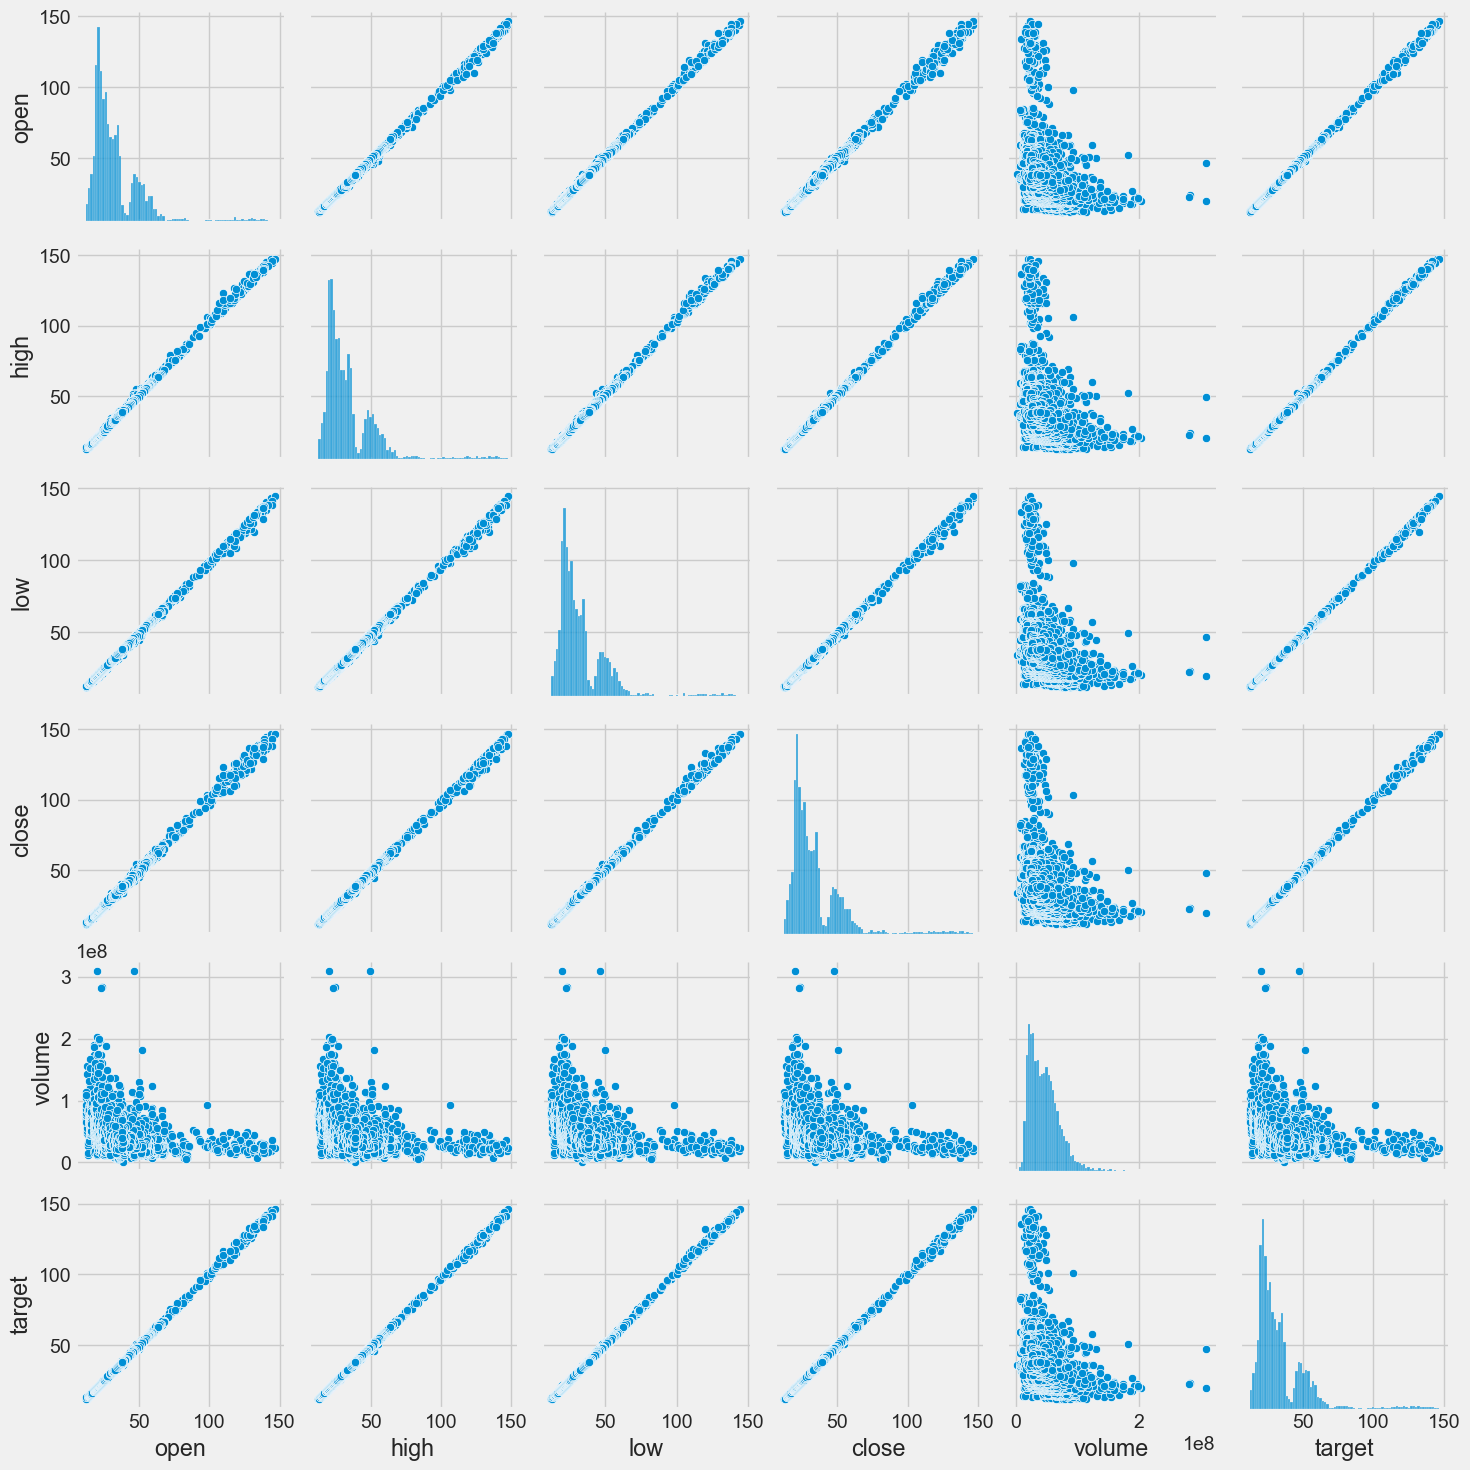

In [141]:
sns.pairplot(data)
plt.show()

Как можно заметить, все фичи обладают сильной коррелированность. Единственная фича, которая не так сильно коррелирована – это volume. Нужно проверить гипотезу о связи volume и std за промежутки времени.

# Общие выводы

Исходя из специфики задачи, доступно очень малое количество данных. Возможно, можно увеличить количество информации с помощью парсинга новостей, но, на сколько известно, такой подход дает слабые результаты.

Следовательно, основная работа должна быть проделана не на этапе препроцессинга данных, а на этапе генерации новых фичей на основе существующих, а также при выборе / тюнинге моделей.